In [1]:
# importing required modules

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import matplotlib.pyplot as plt 

In [2]:
# Loading dataset
data = pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Preparing Data**

In [3]:
X = data.Hours  # features
Y = data.Scores # output

In [4]:
X = np.array(X)
X = X.reshape(-1,1)  # reshaping data(X) into required shape

In [5]:
X.shape, Y.shape

((25, 1), (25,))

In [6]:
#we have loaded the data and, it's already cleaned, let's just go to splitting the data in training and testing part
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size=0.2,random_state=0)

**Training the Algorithm**

In [7]:
algo = LinearRegression() #create an object for linear regression model

In [8]:
algo.fit(X_train,Y_train)  #let's train it on training data
print("Training Completed...")

Training Completed...


In [9]:
m = algo.coef_       #slope
c = algo.intercept_  # intercept

line = m*X + c  # creating a line using slope(m) and intercept(c)

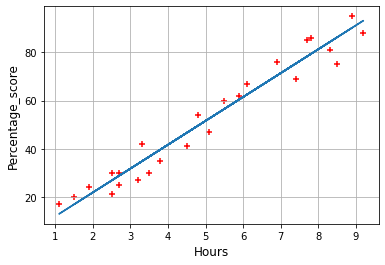

In [10]:
# Plotting the regression line 
plt.plot(X, line)
plt.xlabel("Hours",fontsize=12)
plt.ylabel("Percentage_score",fontsize=12)

# Plotting for the test data
plt.scatter(X,Y,color = "red", marker = "+")
plt.grid()

**Making Predictions**

In [11]:
Y_pred = algo.predict(X_test)  #let's predict output for the test data

In [12]:
algo.predict([[9.25]]) # predicting score if student studies 9.25 hr/day

array([93.69173249])

In [13]:
df = pd.DataFrame({ "Actual":Y_test, "Predicted": Y_pred })

df.reset_index(drop=True)

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Evaluating the model**

In [14]:
from sklearn import metrics

In [15]:
print("Mean Absolute Error :",metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error : 4.183859899002975


**Coefficient of Determination**

In [16]:
score_train = algo.score(X_train, Y_train)
score_test = algo.score(X_test, Y_test)

print("Score Train :", score_train)
print("Score Test :", score_test)

Score Train : 0.9515510725211552
Score Test : 0.9454906892105355
